In [ ]:
import pandas as pd
import numpy as np

# Pivot

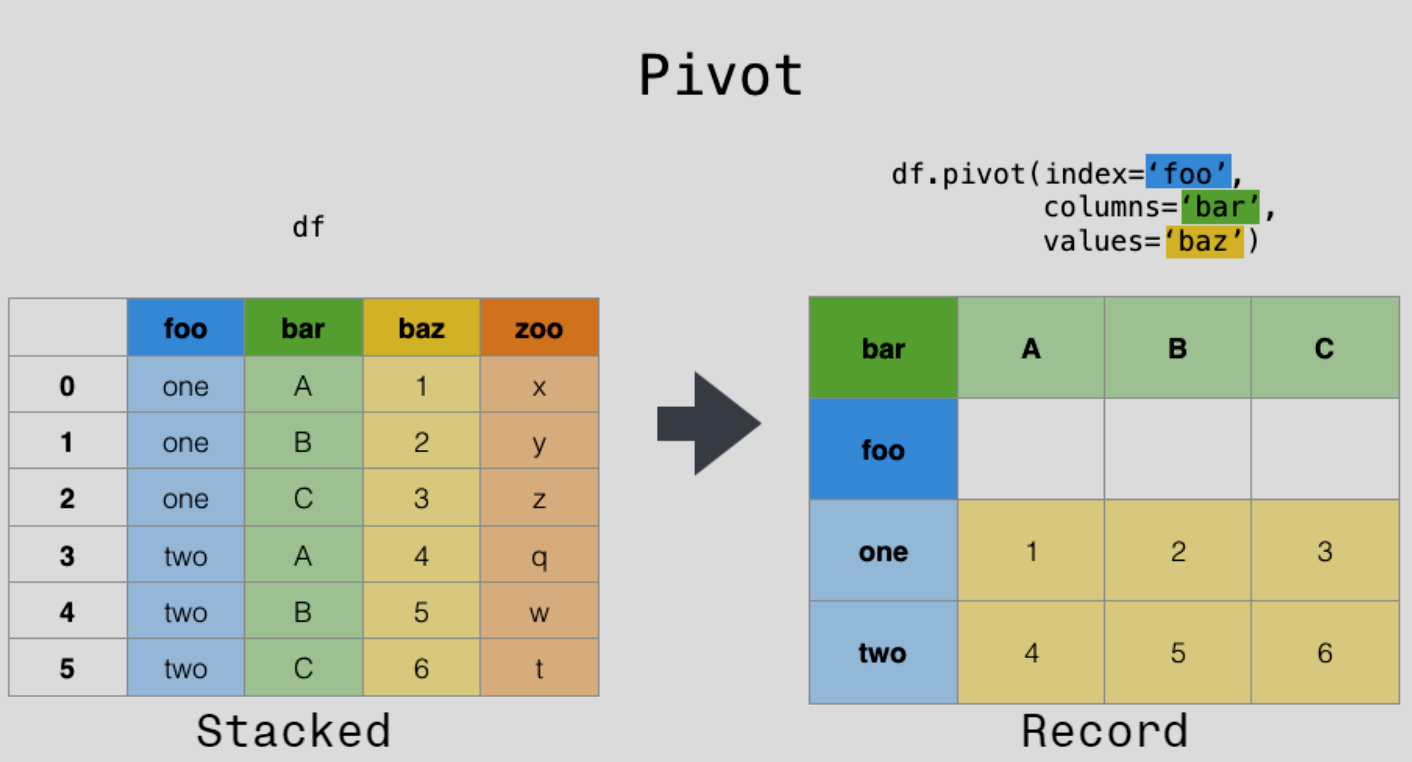

In [ ]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}


df = pd.DataFrame(data)

In [ ]:
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [ ]:
df.pivot(index="date", columns="variable", values="value")

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   value     12 non-null     int64         
 1   variable  12 non-null     object        
 2   date      12 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 416.0+ bytes


Timedelta('1 days 00:00:00')

## Add Features

In [ ]:
df['variable_2'] = pd.Series(['one']*6 + ['two']*6)
df

,value,variable,date,variable_2
0,0,A,2020-01-03,one
1,1,A,2020-01-04,one
2,2,A,2020-01-05,one
3,3,B,2020-01-03,one
4,4,B,2020-01-04,one
5,5,B,2020-01-05,one
6,6,C,2020-01-03,two
7,7,C,2020-01-04,two
8,8,C,2020-01-05,two
9,9,D,2020-01-03,two


In [ ]:
df.pivot(index="date", columns=["variable_2", "variable"], values="value")

variable_2 one    two    
variable     A  B   C   D
date                     
2020-01-03   0  3   6   9
2020-01-04   1  4   7  10
2020-01-05   2  5   8  11

In [ ]:
pd.pivot(df, index=['variable_2', "date"], columns="variable", values="value")

variable                 A    B    C     D
variable_2 date                           
one        2020-01-03  0.0  3.0  NaN   NaN
           2020-01-04  1.0  4.0  NaN   NaN
           2020-01-05  2.0  5.0  NaN   NaN
two        2020-01-03  NaN  NaN  6.0   9.0
           2020-01-04  NaN  NaN  7.0  10.0
           2020-01-05  NaN  NaN  8.0  11.0

In [ ]:
df

,value,variable,date,variable_2
0,0,A,2020-01-03,one
1,1,A,2020-01-04,one
2,2,A,2020-01-05,one
3,3,B,2020-01-03,one
4,4,B,2020-01-04,one
5,5,B,2020-01-05,one
6,6,C,2020-01-03,two
7,7,C,2020-01-04,two
8,8,C,2020-01-05,two
9,9,D,2020-01-03,two


## Add Value

In [ ]:
df['value_2'] = pd.Series(range(10, 22))
df

,value,variable,date,variable_2,value_2
0,0,A,2020-01-03,one,10
1,1,A,2020-01-04,one,11
2,2,A,2020-01-05,one,12
3,3,B,2020-01-03,one,13
4,4,B,2020-01-04,one,14
5,5,B,2020-01-05,one,15
6,6,C,2020-01-03,two,16
7,7,C,2020-01-04,two,17
8,8,C,2020-01-05,two,18
9,9,D,2020-01-03,two,19


In [ ]:
df.pivot(index="date", columns=["variable_2", "variable"], values=["value", 'value_2'])

value            value_2            
variable_2   one    two         one     two    
variable       A  B   C   D       A   B   C   D
date                                           
2020-01-03     0  3   6   9      10  13  16  19
2020-01-04     1  4   7  10      11  14  17  20
2020-01-05     2  5   8  11      12  15  18  21

In [ ]:
df.pivot(index=['variable_2', "date"], columns="variable", values=["value", 'value_2'])

value                 value_2                  
variable                  A    B    C     D       A     B     C     D
variable_2 date                                                      
one        2020-01-03   0.0  3.0  NaN   NaN    10.0  13.0   NaN   NaN
           2020-01-04   1.0  4.0  NaN   NaN    11.0  14.0   NaN   NaN
           2020-01-05   2.0  5.0  NaN   NaN    12.0  15.0   NaN   NaN
two        2020-01-03   NaN  NaN  6.0   9.0     NaN   NaN  16.0  19.0
           2020-01-04   NaN  NaN  7.0  10.0     NaN   NaN  17.0  20.0
           2020-01-05   NaN  NaN  8.0  11.0     NaN   NaN  18.0  21.0

## Duplicates

In [ ]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}


df = pd.DataFrame(data)
df = pd.concat([df, pd.DataFrame({'value':12, 'variable': 'A', 'date': pd.to_datetime(['2020-01-03'])})]).reset_index(drop=True)
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [ ]:
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [ ]:
df.pivot(index="date", columns="variable", values="value")

ValueError: Index contains duplicate entries, cannot reshape

# Pivot_table

In [ ]:
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [ ]:
df.pivot_table(index="date", columns="variable", values="value", aggfunc=pd.Series.nunique)

variable,A,B,C,D
date,,,,
2020-01-03,2,1,1,1
2020-01-04,1,1,1,1
2020-01-05,1,1,1,1


# Cohort analysis

In [ ]:
# Создаем DataFrame с данными о покупках клиентов
data = {
    'Клиент_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Дата_регистрации': ['2023-01-15', '2023-01-20', '2023-02-10', '2023-02-15', '2023-03-05']*2,
    'Дата_покупки': ['2023-01-20', '2023-01-25', '2023-02-15', '2023-02-20', '2023-03-10',
                     '2023-01-20', '2023-01-30', '2023-02-19', '2023-02-20', '2023-03-10'],
    'Сумма_покупки': [100, 150, 200, 250, 300, 100, 200, 300, 200, 130]
}
df = pd.DataFrame(data)

# Преобразуем столбцы с датами из строкового формата в формат datetime
df['Дата_регистрации'] = pd.to_datetime(df['Дата_регистрации'])
df['Месяц_регистрации'] = df['Дата_регистрации'].dt.to_period('M')

In [ ]:
df

,Клиент_ID,Дата_регистрации,Дата_покупки,Сумма_покупки,Месяц_регистрации
0,1,2023-01-15,2023-01-20,100,2023-01
1,2,2023-01-20,2023-01-25,150,2023-01
2,3,2023-02-10,2023-02-15,200,2023-02
3,4,2023-02-15,2023-02-20,250,2023-02
4,5,2023-03-05,2023-03-10,300,2023-03
5,6,2023-01-15,2023-01-20,100,2023-01
6,7,2023-01-20,2023-01-30,200,2023-01
7,8,2023-02-10,2023-02-19,300,2023-02
8,9,2023-02-15,2023-02-20,200,2023-02
9,10,2023-03-05,2023-03-10,130,2023-03


In [ ]:
pd.pivot_table(df, values='Сумма_покупки', index='Месяц_регистрации', columns='Дата_покупки', aggfunc='sum', fill_value=0)

Дата_покупки,2023-01-20,2023-01-25,2023-01-30,2023-02-15,2023-02-19,2023-02-20,2023-03-10
Месяц_регистрации,,,,,,,
2023-01,200,150,200,0,0,0,0
2023-02,0,0,0,200,300,450,0
2023-03,0,0,0,0,0,0,430
